# Apply ML in Predict house price in Real Estate dataset P1
* Name: Ha Ngo
* Email: nvh1211@gmail.com
* Date: 06/06/2024

## Task 1 – Problem Formulation, Data Acquisition and Preparation, Exploration and Modelling

In [54]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### 1.1 Data Acquisition and Preparation

Analyzing real estate valuation provides insights into preferred residential areas within a city. Higher prices indicate greater demand for those properties. Forecasting real estate values can assist in urban planning and policy-making by identifying key factors that influence property prices. The dataset "Real Estate Valuation" was chosen and our goal is to predict real estate values using various features. The dataset originates from the UCI Machine Learning Repository and was donated by Professor Yeh, I-Cheng. It focuses on real estate properties situated in the Sindian district of New Taipei city, Taiwan. The dataset comprises 414 instances, each with 7 attributes.

| Designation | Attribute | Unit | Value for example | | --- | --- | | X1 | Transaction date | year and month | 2013.250=2013 March, 2013.500=2013 June, etc. | | X2 | House age | year | 32 | | X3 | Distance to the nearest MRT station | meter | 84.87882 | | X4 | Number of convenience stores in the living circle on foot | Integer | 10 | | X5 | Geographic coordinate: latitude | degree | 24.98298 | | X6 | Geographic coordinate: longitude | degree | 121.54024 | | Y | house price of unit area | 10,000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared | 37.9|

In [89]:
# Load the data into a pandas DataFrame
df = pd.read_csv("https://archive.ics.uci.edu/static/public/477/data.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [91]:
# Rename the columns to make them easier to work with
df.columns = ['No', 'TransactionDate', 'HouseAge', 'DistanceToMRT', 'NumberOfStores', 'Latitude', 'Longitude', 'HousePricePerUnit']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No                 414 non-null    int64  
 1   TransactionDate    414 non-null    float64
 2   HouseAge           414 non-null    float64
 3   DistanceToMRT      414 non-null    float64
 4   NumberOfStores     414 non-null    int64  
 5   Latitude           414 non-null    float64
 6   Longitude          414 non-null    float64
 7   HousePricePerUnit  414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [57]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

No                   0
TransactionDate      0
HouseAge             0
DistanceToMRT        0
NumberOfStores       0
Latitude             0
Longitude            0
HousePricePerUnit    0
dtype: int64


In [58]:
df.describe()

,No,TransactionDate,HouseAge,DistanceToMRT,NumberOfStores,Latitude,Longitude,HousePricePerUnit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


As we can observe, the data file has 8 columns and 414 rows, and there are no missing values. Therefore, we will proceed to explore the dataset.

### 1.2 Exploration

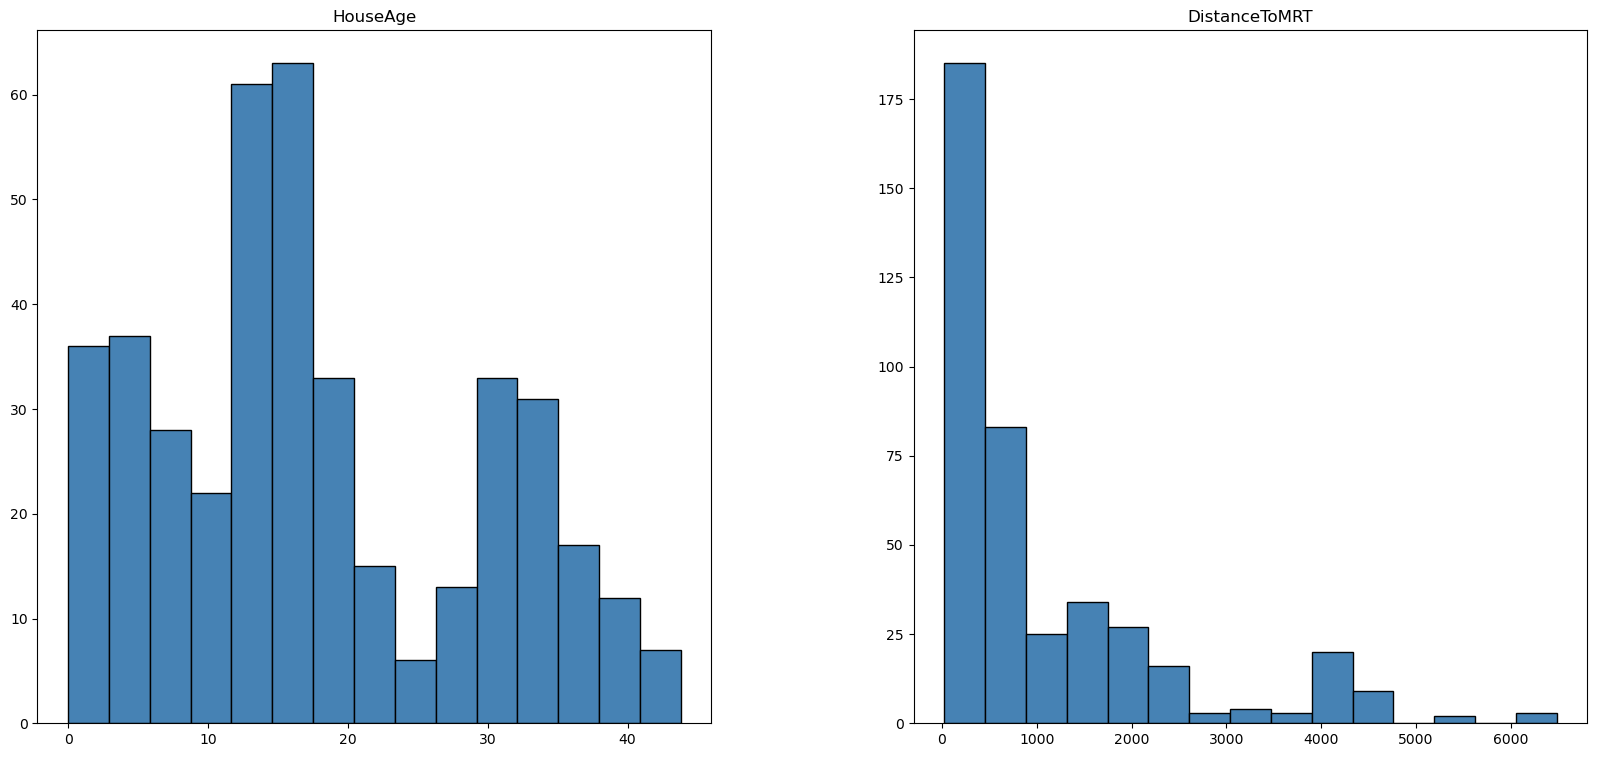

In [59]:
# Exploring the distribution of continuous variables
fig = df[['HouseAge','DistanceToMRT']].hist(bins=15, color='steelblue', edgecolor='black',
                                            xlabelsize=10, ylabelsize=10, figsize=(20,9),grid=False)

Here are some observations on the distribution of the continuous variables:
* The age of the houses ranges from 0 to 43 years, with three peaks observed at 12-18 years, 0-6 years, and 30-36 years.
* The majority of the houses are located within 1 km of the nearest MRT station.

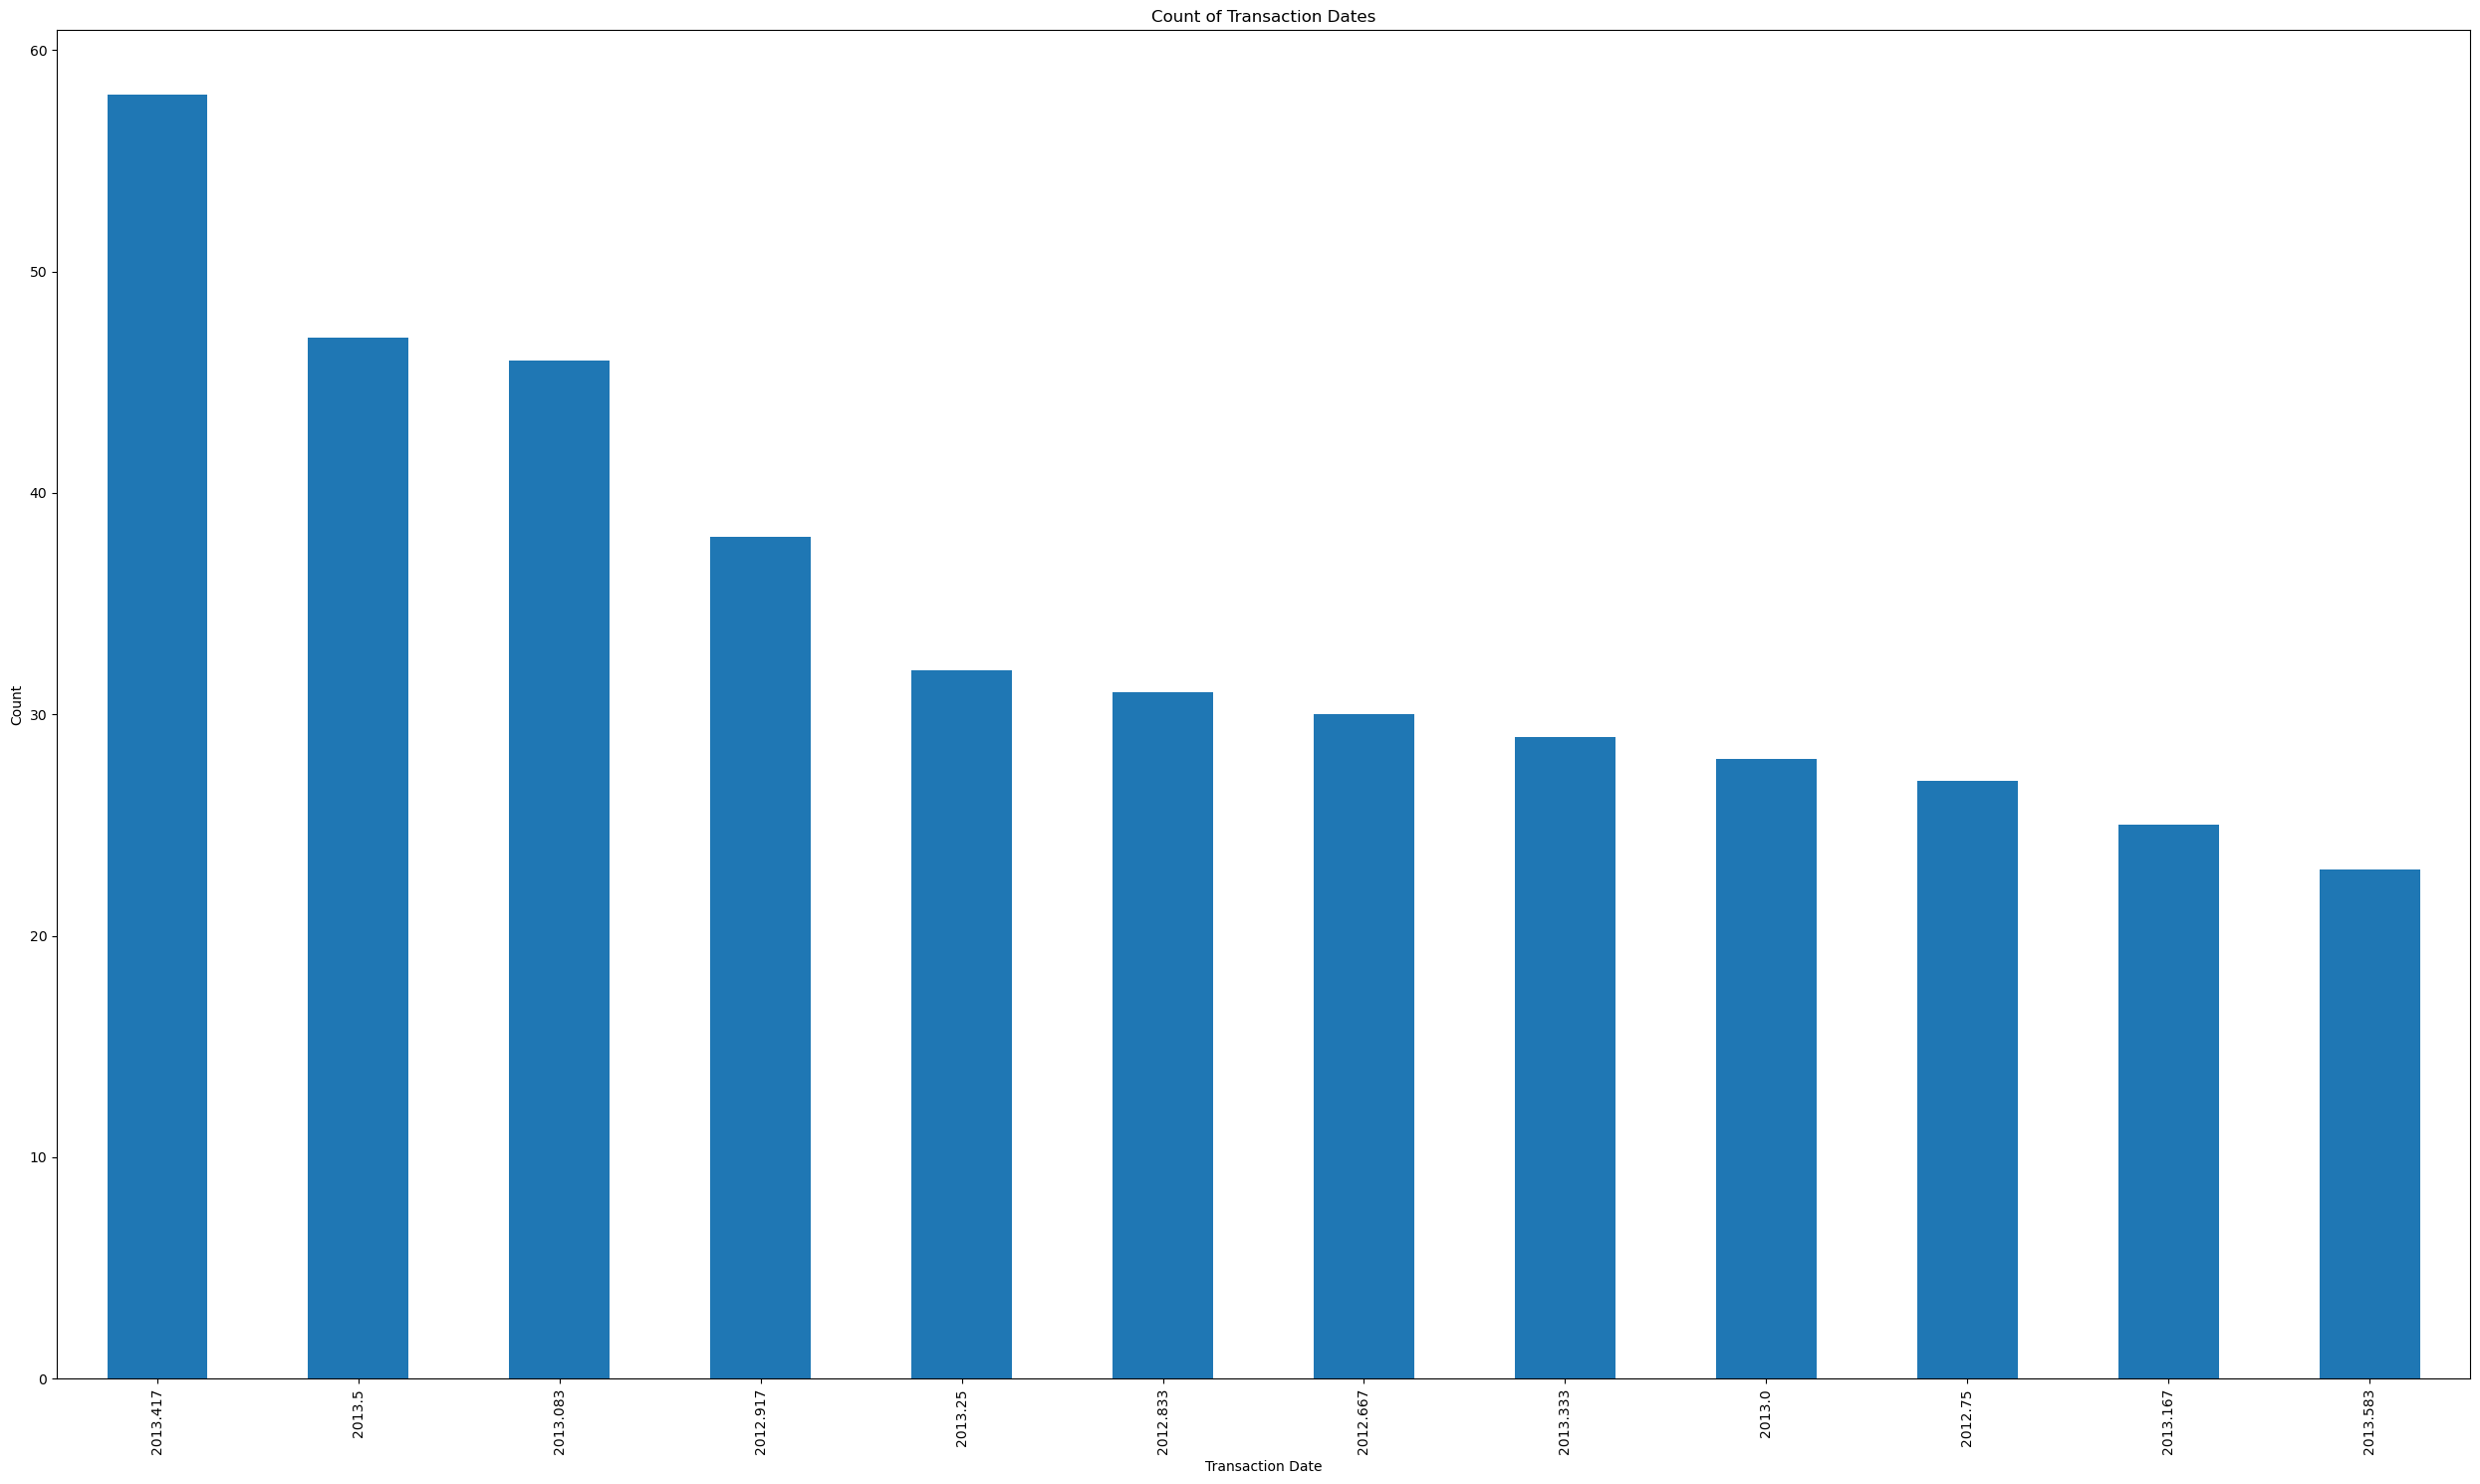

In [60]:
# Exploring the Transaction date:
count = df['TransactionDate'].value_counts()
count.plot(kind='bar', figsize=(10, 6), title='Count of Transaction Dates', xlabel='Transaction Date', ylabel='Count')
plt.tight_layout(rect=(0, 0, 2.5, 2.5))

We can see that the number of transactions had a peak in May 2013, and was higher than the average on 3 other months: November 2012, January 2013 and June 2013.

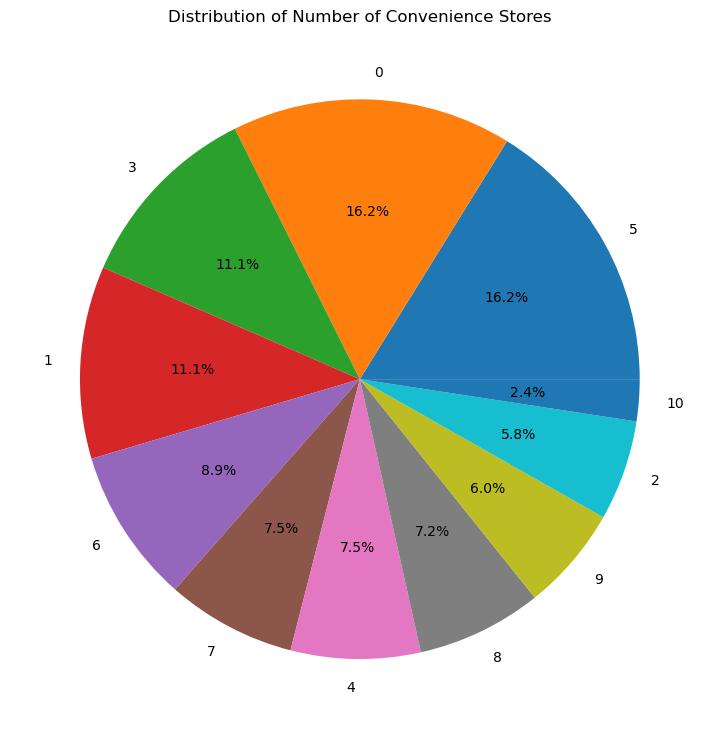

In [61]:
# Exploring the Number of stores
counts = df['NumberOfStores'].value_counts()
plt.figure(figsize=(4, 3))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Distribution of Number of Convenience Stores')
plt.tight_layout(rect=(0, 0, 2.5, 2.5))

* Approximately one in six houses does not have any convenience stores within walking distance, suggesting they are likely situated in residential areas.
* Half of the houses have between one and six convenience stores within walking distance.

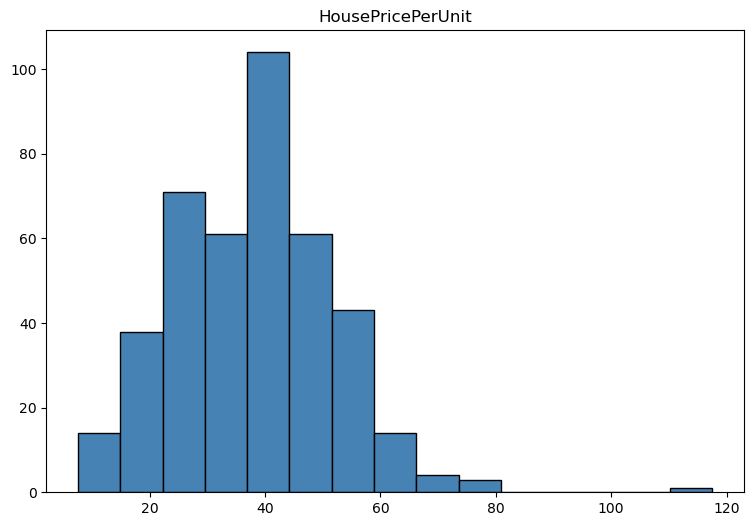

In [62]:
# The Latitude and Langtitude are geographic coordinate valuesso I'm not going to analyze those columns.
# Let's explore the distribution of House price of unit area
fig2 = df[['HousePricePerUnit']].hist(bins=15, color='steelblue', edgecolor='black', xlabelsize=10, ylabelsize=10,
                                     figsize=(9,6), grid=False)

In [92]:
df['HousePricePerUnit'].sort_values(ascending = False)

270    117.5
220     78.3
312     78.0
166     73.6
105     71.0
       ...  
226     12.8
116     12.2
162     11.6
347     11.2
113      7.6
Name: HousePricePerUnit, Length: 414, dtype: float64

We observe the following distribution for house prices per unit area:
* House prices per unit area vary widely, ranging from 76,000 Taiwan Dollars/Ping to over 1 million Taiwan Dollars/Ping.
* More than half of the house prices per unit area fall between 250,000 and 500,000 Taiwan Dollars/Ping.
* There are 8 houses with unit area prices exceeding 650,000 Taiwan Dollars/Ping, with one reaching an extreme value of 1,115,000 Taiwan Dollars/Ping.

__Question 1:__ What is the correlation between the house age and the house price of unit area? Does the age of the house significantly affect its price per unit area?

Text(0, 0.5, 'House Price per Unit Area')

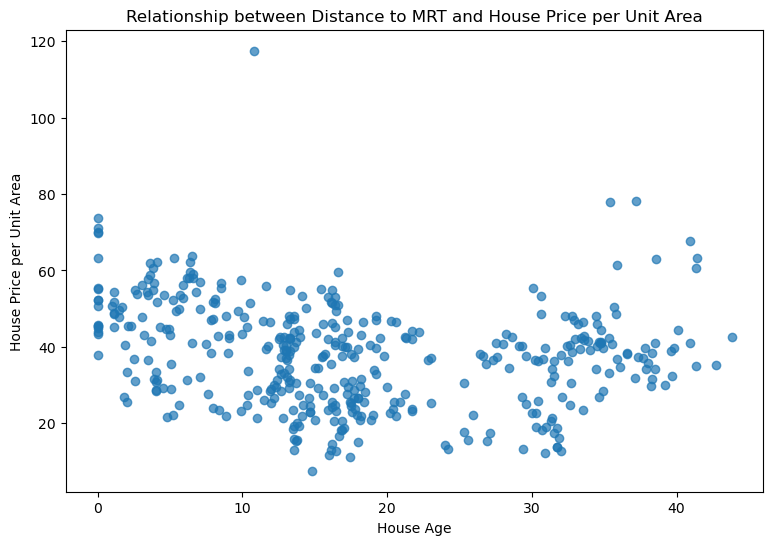

In [64]:
# Using scatter plot to analyze the relationship between the house age and the house price of unit area
plt.figure(figsize=(9, 6))
plt.scatter(x=df['HouseAge'], y=df['HousePricePerUnit'], alpha = 0.7)
plt.title('Relationship between Distance to MRT and House Price per Unit Area')
plt.xlabel('House Age')
plt.ylabel('House Price per Unit Area')

In [65]:
# Use the corr() method to explore the pairwise correlation
df_corr = df.corr()
print ("Correlation matrix between features:")
df_corr

Correlation matrix between features:


,No,TransactionDate,HouseAge,DistanceToMRT,NumberOfStores,Latitude,Longitude,HousePricePerUnit
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
TransactionDate,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
HouseAge,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
DistanceToMRT,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
NumberOfStores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
Latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
Longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
HousePricePerUnit,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


Text(0.5, 0.98, 'Heatmap of Correlation Matrix')

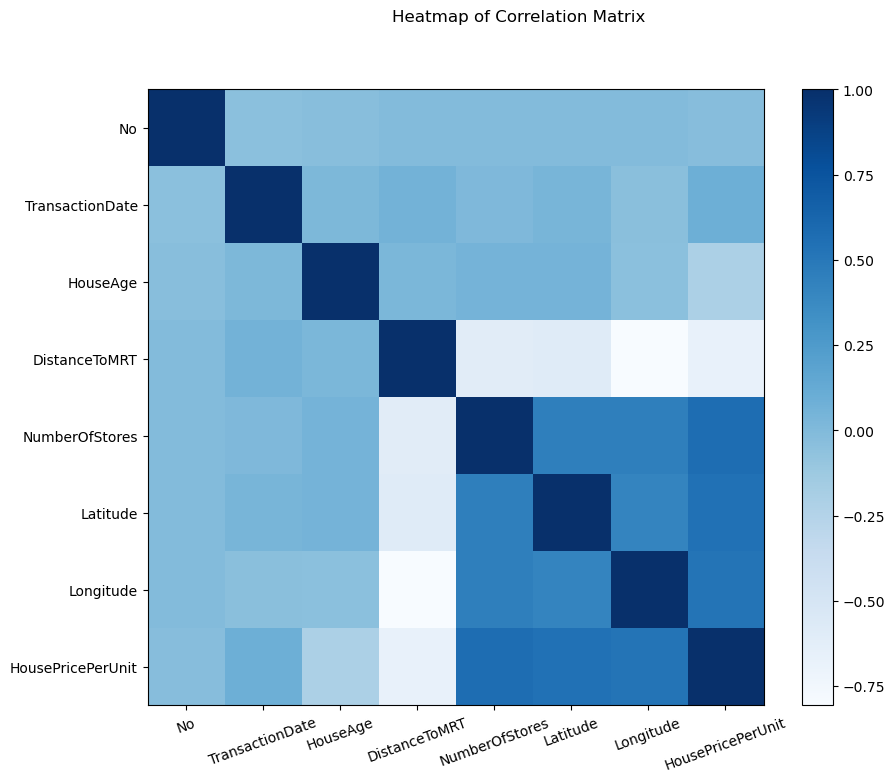

In [66]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(df_corr, cmap='Blues', interpolation='none')
plt.colorbar()
plt.xticks(range(len(df_corr)), df_corr.columns, rotation=20)
plt.yticks(range(len(df_corr)), df_corr.columns)
plt.suptitle('Heatmap of Correlation Matrix')

The Correlation matrix shows that the correlation between house age and house price per unit area is approximately -0.21. This negative correlation indicates a weak inverse relationship, meaning that as the house age increases, the house price per unit area tends to decrease. 

Scatter plot can also indicate that newer houses tend to have higher prices per unit area. Beside, we can realize other points:
 - For houses aged between 0 and 10 years, there is a wide range of prices, from around 20 to above 80. This indicates a significant variation in prices for newer houses.
 - The highest price per unit area (around 120) is an outlier and belongs to a very young house.
 - For houses aged between 10 and 20 years, the prices tend to be more concentrated around 40 to 60, with fewer extreme values.
 - Houses aged over 30 years generally show lower prices per unit area, with most prices clustering around 20 to 40. However, there are still some variations, with a few houses priced higher.
 
There is 1 more important reason for the weak correlation between house age and house price is lacking house's information. We do not have specific information such as whether it is a house or apartment, the number of bedrooms, etc.

__Question 2:__ How does the distance to the nearest MRT station affect the house price of unit area? Is there a trend that houses closer to MRT stations have higher prices per unit area?

Based on the above corelation matrix, we can see that the correlation value between the Distence to the nearest MRT and the house price is -0.673613, this value suggests a strong inverse relationship. Houses that are closer to MRT stations generally have higher prices per unit area. This is consistent with the expectation that proximity to public transportation is a valuable amenity.This opinion will also be represented in the following chart:

Text(0, 0.5, 'House Price per Unit Area')

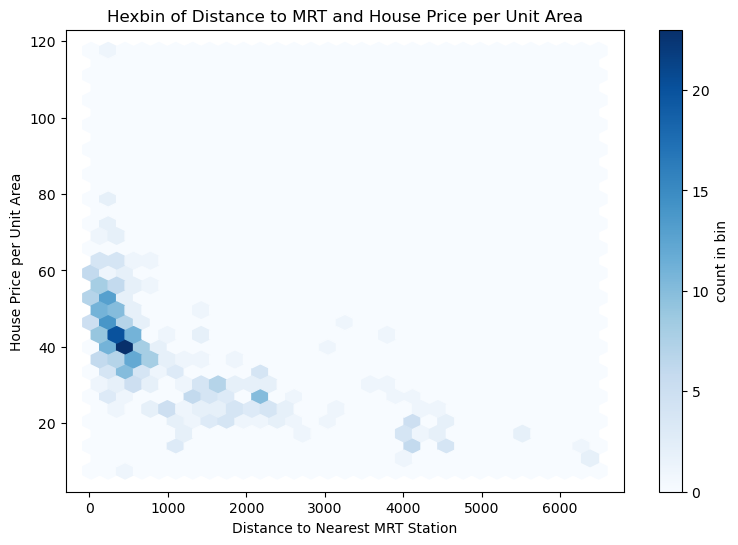

In [67]:
plt.figure(figsize=(9, 6))
plt.hexbin(df['DistanceToMRT'], df['HousePricePerUnit'], gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')
plt.title('Hexbin of Distance to MRT and House Price per Unit Area')
plt.xlabel('Distance to Nearest MRT Station')
plt.ylabel('House Price per Unit Area')

Observing the chart can easily make us realize that most of the houses that have been sold are less than 1km away from the MRT and have a much higher price than those houses that are further away from the MRT station. This can be explained by the following factors:
- Convenience: In Taipei, as in many urban areas, being close to an MRT station is highly desirable. It provides easy access to public transportation, reducing commute times and improving access to various parts of the city.
- Higher Demand: The convenience of being near an MRT station drives up demand for such properties, which in turn drives up their prices.
- Amenities and Infrastructure: Areas near MRT stations often have better infrastructure and more amenities (such as shops, restaurants, and schools), making them more attractive to potential buyers or renters.

This trend aligns with the realities of urban living in Taipei, where access to efficient and reliable public transportation is a significant factor in property values.

__Question 3:__ Is there a relationship between the geographical location of the house and the house price of unit area? Are there certain areas (latitude, longitude) where houses tend to have higher prices per unit area?

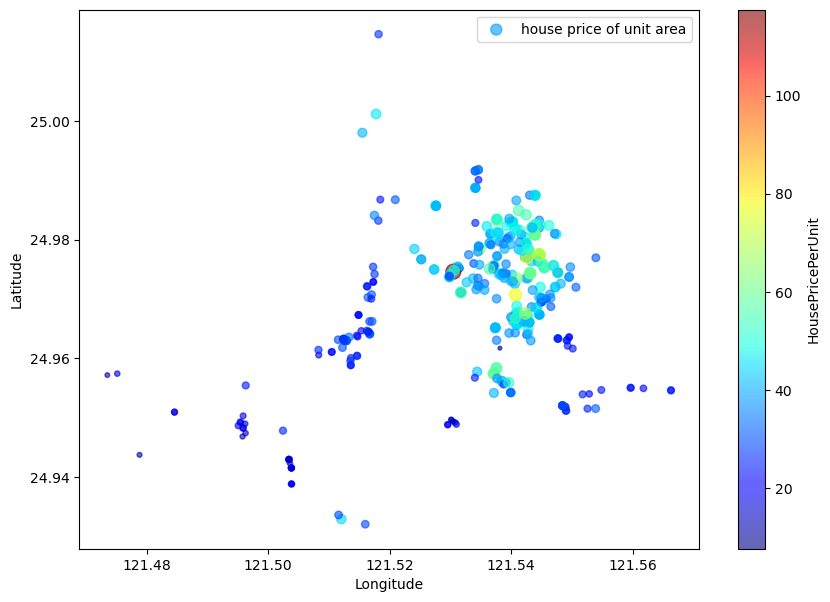

In [68]:
# Exploring the geographical distribution of house prices per unit area by latitude and longitude:
df.plot(kind="scatter", x="Longitude", y="Latitude", s=df["HousePricePerUnit"], label="house price of unit area",
        c= 'HousePricePerUnit', cmap=plt.get_cmap("jet"), colorbar=True, alpha=0.6, figsize=(10,7),)
plt.legend()

The scatter plot, combined with the realities of the Xindian District in Taipei, reveals a significant relationship between geographical location and house prices per unit area. The chart shows that higher house prices per unit area (indicated by green, yellow, and red dots) are concentrated around the central coordinates of approximately 24.98 latitude and 121.54 longitude. This central region corresponds to areas near the Dapinglin MRT station and the Xindian River, which are known for their desirable residential characteristics.

In the Xindian District, proximity to MRT stations like Dapinglin enhances commuting convenience and boosts property values. Central areas are well-developed with robust infrastructure, good schools, shopping centers, and recreational amenities, all of which contribute to higher house prices. The Bitan Scenic Area, offering scenic views and leisure activities, further elevates the attractiveness and value of properties in these central locations.

Conversely, the outskirts of Xindian, represented by darker blue dots in the chart, show lower house prices per unit area. These peripheral regions are farther from the central amenities, MRT stations, and developed infrastructure, making them less desirable and consequently cheaper.

### 1.3 Modelling

I'm going to apply the Multiple Linear Regression and Random Forest method to predict the house price of unit area in the data set. In the process of studying the distribution of house prices of unit area, we found an outlier value of 117.5, so we will delete the row containing this value to get a better prediction model.

In [69]:
df = df[df['HousePricePerUnit'] != 117.5]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 413
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No                 413 non-null    int64  
 1   TransactionDate    413 non-null    float64
 2   HouseAge           413 non-null    float64
 3   DistanceToMRT      413 non-null    float64
 4   NumberOfStores     413 non-null    int64  
 5   Latitude           413 non-null    float64
 6   Longitude          413 non-null    float64
 7   HousePricePerUnit  413 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 29.0 KB


In [79]:
df['HousePricePerUnit'].sort_values(ascending = False).head(10)

220    78.3
312    78.0
166    73.6
105    71.0
16     70.1
379    69.7
389    67.7
413    63.9
258    63.3
361    63.3
Name: HousePricePerUnit, dtype: float64

The data set now has 413 entries and 8 columns.

In [80]:
# Preprocess the data and Define the variables
X = df.drop(['No','HousePricePerUnit'], axis =1)
y = df['HousePricePerUnit']

In [81]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [82]:
# Split the data into training and testing sets with 80/20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### 1.3.1 Applying Linear Regression model

In [83]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear Regression applied
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Print performance of Linear Regression
print("Linear Regression Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_linear)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_linear)}")
print(f"R²: {r2_score(y_test, y_pred_linear)}")

Linear Regression Performance:
MAE: 5.3507203324820365
MSE: 42.34276374770451
R²: 0.7137263196454049


Because Linear Regression model has no hyperparameter to tune, so I'm going to use K-fold Cross-Validation to check if it is a good predicting model

In [84]:
# Create a cross-validation scheme
folds = KFold(n_splits=5, shuffle=True, random_state=100)

# Apply cross_val_score
scores_mae = cross_val_score(linear_model, X_train, y_train, scoring='neg_mean_absolute_error', cv=folds)
print(scores_mae)

scores_mse = cross_val_score(linear_model, X_train, y_train, scoring='neg_mean_squared_error', cv=folds)
print(scores_mse)

scores_r2 = cross_val_score(linear_model, X_train, y_train, scoring='r2', cv=folds)
print(scores_r2)

[-6.19421038 -6.37343172 -7.10628149 -5.69272852 -6.54217417]
[-72.72847894 -69.69238586 -97.38443685 -48.14344559 -77.81871292]
[0.6446117  0.46920766 0.5358642  0.7162498  0.50160283]


### 1.3.2 Applying Random Forest Regression

In [85]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

# Print performance of Linear Regression
print("Random Forest Regressor Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf)}")
print(f"R²: {r2_score(y_test, y_pred_rf)}")

Random Forest Regressor Performance:
MAE: 3.96484427710843
MSE: 27.98438423377424
R²: 0.8108013753000721


In [86]:
# Random Forest Regression with hyperparameter tuning using GridSearchCV
# Specify range of hyperparameters to tune
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}

grid_search = GridSearchCV(estimator=random_forest, param_grid=rf_params, cv=folds, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters for Random Forest:")
print(grid_search.best_params_)
print()

# Evaluate the best model
best_rf_model = grid_search.best_estimator_
y_pred_randomforest = best_rf_model.predict(X_test)

print("Random Forest Performance with Best Hyperparameters:")
print(f"MAE 2: {mean_absolute_error(y_test, y_pred_randomforest)}")
print(f"MSE 2: {mean_squared_error(y_test, y_pred_randomforest)}")
print(f"R² 2: {r2_score(y_test, y_pred_randomforest)}")

Best Hyperparameters for Random Forest:
{'max_depth': 30, 'n_estimators': 200}

Random Forest Performance with Best Hyperparameters:
MAE 2: 3.823304568273103
MSE 2: 26.366371846824546
R² 2: 0.8217405375057164


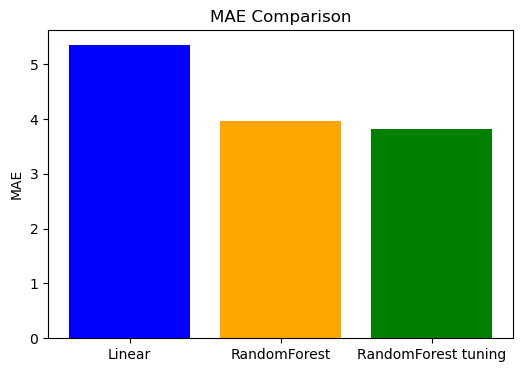

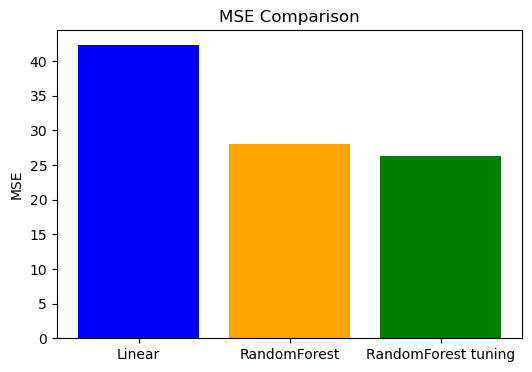

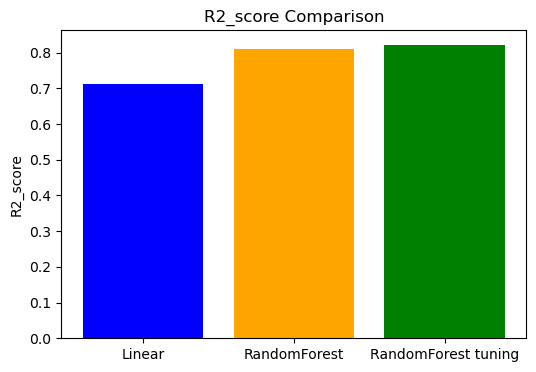

In [87]:
# Present the results in a table or chart:
metrics = {
    'MAE': [mean_absolute_error(y_test, y_pred_linear), mean_absolute_error(y_test, y_pred_rf), mean_absolute_error(y_test, y_pred_randomforest)],
    'MSE': [mean_squared_error(y_test, y_pred_linear), mean_squared_error(y_test, y_pred_rf), mean_squared_error(y_test, y_pred_randomforest)],
    'R2_score': [r2_score(y_test, y_pred_linear), r2_score(y_test, y_pred_rf), r2_score(y_test, y_pred_randomforest)]
}

# Model names
models = ['Linear', 'RandomForest', 'RandomForest tuning']

# Create a bar chart for each metric
for metric, values in metrics.items():
    plt.figure(figsize=(6, 4))
    plt.bar(models, values, color=['blue', 'orange', 'green'])
    plt.title(f'{metric} Comparison')
    plt.ylabel(metric)

These charts show a very clear result that the performance of the Random Forest model significantly surpasses the performance of the Linear Regression model when applied to the real estate valuation dataset. Even when we fine-tune some hyperparameters, we can still slightly improve the performance of the Random Forest model.